In [ ]:
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from diffusers import AutoencoderDC
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

(np.float64(-0.5), np.float64(5183.5), np.float64(3887.5), np.float64(-0.5))

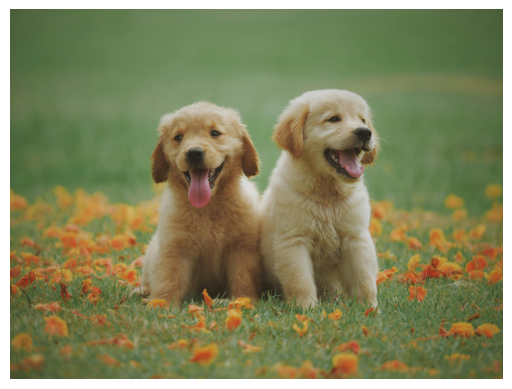

In [5]:
image = Image.open("Images/testImage.jpg").convert("RGB")
plt.imshow(image)
plt.axis("off")

In [7]:
preprocessImage = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

imageTensor = preprocessImage(image).unsqueeze(0)
imageTensor.shape

torch.Size([1, 3, 512, 512])

In [ ]:
dcaeEncoder = AutoencoderDC.from_pretrained(f"mit-han-lab/dc-ae-f64c128-in-1.0-diffusers", torch_dtype=torch.float32).to(device).eval()

In [10]:
def EncodeImageDCAE(image):
    dcaeEncoder = AutoencoderDC.from_pretrained(f"mit-han-lab/dc-ae-f64c128-in-1.0-diffusers", torch_dtype=torch.float32).to(device).eval()
    latents = dcaeEncoder.encode(image).latent
    return latents

imageTensor.to(device)
encodedImg = EncodeImageDCAE(imageTensor)
imageTensor.shape, encodedImg.shape

(torch.Size([1, 3, 512, 512]), torch.Size([1, 128, 8, 8]))

In [14]:
def DecodeImageDCAE(image, deNormalize = False):
    dcaeEncoder = AutoencoderDC.from_pretrained(f"mit-han-lab/dc-ae-f64c128-in-1.0-diffusers", torch_dtype=torch.float32).to(device).eval()
    decoded = dcaeEncoder.decode(image).sample
    if deNormalize:
        decoded = decoded * 0.5 + 0.5

    return decoded

decodedImg = DecodeImageDCAE(encodedImg)
encodedImg.shape, decodedImg.shape

(torch.Size([1, 128, 8, 8]), torch.Size([1, 3, 512, 512]))

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

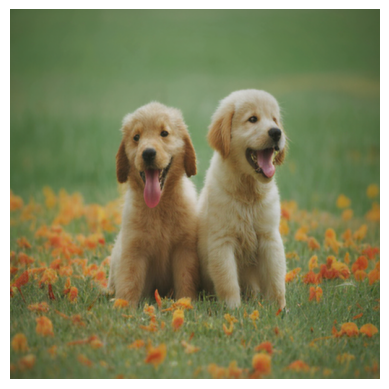

In [15]:
decodedImg = decodedImg * 0.5 + 0.5
decodedImg = transforms.ToPILImage()(decodedImg.squeeze(0))
plt.imshow(decodedImg)
plt.axis("off")

Image Size (Batch Size, Channels, Image Height, Image Width) -> Encoded Image (Batch Size, 128, Image Height/64, Image Width/64)

In [17]:
128/3


42.666666666666664